In [1]:
import os
import zipfile
import random
import shutil
import numpy as np 
import pandas as pd 
import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
!pip install celluloid 
from celluloid import Camera


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if 'zip' in os.path.join(dirname, filename):
            zip_ref  = zipfile.ZipFile(os.path.join(dirname, filename), 'r')
            zip_ref.extractall('/kaggle/working')
        zip_ref.close()

        
source_path_train = '/kaggle/working/train'
source_path_test = '/kaggle/working/test1'

# creating dogs and cats directories
os.makedirs('/kaggle/working/images/dogs')
os.makedirs('/kaggle/working/images/cats')

os.makedirs('/kaggle/working/cats-v-dogs')

images_dogs = '/kaggle/working/images/dogs'
images_cats = '/kaggle/working/images/cats'

root_dir = '/kaggle/working/cats-v-dogs'

data_train_list = os.listdir(source_path_train)
cat_jpg_train = [jpg for jpg in data_train_list if 'cat' in jpg]
dog_jpg_train = [jpg for jpg in data_train_list if 'dog' in jpg]
# ls -R | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/'

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
def move_jpg(photo_names: list, source_path: str, dest_path: str, split_data=0):
    
    # moving photos to subdirectories cats and dogs
    for photo in photo_names:
        shutil.move(os.path.join(source_path, photo), os.path.join(dest_path, photo))

# moving photos of cats to new directory 'trainig/cats'
move_jpg(cat_jpg_train, source_path_train, images_cats )

# moving photos of dogs to new subdirectory 'training/dogs'
move_jpg(dog_jpg_train, source_path_train, images_dogs )

In [3]:
print(f'Number of images in train directory: {len(os.listdir(source_path_train))}')
print(f'Number of images in test directory: {len(os.listdir(source_path_test))}')
print(f'Number of images in dogs directory: {len(os.listdir(images_dogs))}')
print(f'Number of images in cats directory: {len(os.listdir(images_cats))}')

Number of images in train directory: 0
Number of images in test directory: 12500
Number of images in dogs directory: 12500
Number of images in cats directory: 12500


In [4]:
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)


def create_train_test_dirs(root_path):
    training_cats_dir = 'training/cats'
    training_dogs_dir = 'training/dogs'

    testing_cats_dir = 'testing/cats'
    testing_dogs_dir = 'testing/dogs'

    directories = [training_cats_dir, 
                 training_dogs_dir, 
                 testing_cats_dir, 
                 testing_dogs_dir]

    for dir in directories:
        os.makedirs(os.path.join(root_path, dir))

try:
    create_train_test_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/kaggle/working/cats-v-dogs/testing
/kaggle/working/cats-v-dogs/training
/kaggle/working/cats-v-dogs/testing/cats
/kaggle/working/cats-v-dogs/testing/dogs
/kaggle/working/cats-v-dogs/training/cats
/kaggle/working/cats-v-dogs/training/dogs


In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    source_data_list = os.listdir(SOURCE)

    # testing for photos with size 0
    for photo in source_data_list:
        if os.path.getsize(os.path.join(SOURCE, photo)) == 0:
            source_data_list.remove(photo)
      
    # shuffled list of photos
    source_data_list = random.sample(source_data_list, len(source_data_list))

    # training 
    trainig_photos = source_data_list[ :int(len(source_data_list) * SPLIT_SIZE)]

    # test 
    testing_photos = source_data_list[int(len(source_data_list) * SPLIT_SIZE): ]

    # copying trainig data 
    for train_photo in trainig_photos:
        shutil.move( os.path.join(SOURCE, train_photo), os.path.join(TRAINING, train_photo) )

    # copying test data
    for test_photo in testing_photos:
        shutil.move( os.path.join(SOURCE, test_photo), os.path.join(TESTING, test_photo) )

In [7]:
# Define paths
CAT_SOURCE_DIR = '/kaggle/working/images/dogs'
DOG_SOURCE_DIR = '/kaggle/working/images/cats'

TRAINING_DIR = "/kaggle/working/cats-v-dogs/training/"
TESTING_DIR = "/kaggle/working/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
    for file in os.scandir(TESTING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
    for file in os.scandir(TESTING_DOGS_DIR):
        os.remove(file.path)


split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")



There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


In [8]:
# callback class
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.99):
            print('\nReached desired training accuracy of 99%. Training stopped!')
            self.model.stop_training = True

In [9]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

def create_model():
    
    model = tf.keras.models.Sequential([
                                      
              tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)), 
              tf.keras.layers.MaxPool2D(2,2),

              tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPool2D(2,2),

              tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPool2D(2,2),

              tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
              tf.keras.layers.MaxPool2D(2,2),

              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512, activation='relu'),
              tf.keras.layers.Dense(1, activation='sigmoid')  
        ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy',
                  metrics=['accuracy']) 

    return model


In [10]:
def train_val_generators_aug(TRAINING_DIR, VALIDATION_DIR):
    
    train_datagen_aug = ImageDataGenerator( rescale = 1.0 / 255.,
                                        rotation_range=45,
                                        width_shift_range=0.25,
                                        height_shift_range=0.25,
                                        shear_range=0.25,
                                        zoom_range=0.25,
                                        horizontal_flip=True,
                                        fill_mode='nearest')


    train_generator_aug = train_datagen_aug.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))


    validation_datagen_aug = ImageDataGenerator( rescale = 1.0 / 255.)


    validation_generator_aug = validation_datagen_aug.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=20,
                                                                  class_mode='binary',
                                                                  target_size=(150, 150))

    return train_generator_aug, validation_generator_aug

In [11]:
train_generator_aug, validation_generator_aug = train_val_generators_aug(TRAINING_DIR, TESTING_DIR)
model_augumented = create_model()
callbacks = myCallbacks()
history = model_augumented.fit(train_generator_aug,
                    epochs=150,
                    batch_size=16, # this time batch size was added ver.3 previous stopped on 93% and 89%
                    verbose=1,
                    validation_data=validation_generator_aug,
                    callbacks=[callbacks])

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


2022-02-19 20:32:50.612604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:32:50.721552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:32:50.722217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 20:32:50.723364: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/150


2022-02-19 20:32:55.075405: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1125/1125 [==============================] - 171s 145ms/step - loss: 0.6739 - accuracy: 0.5659 - val_loss: 0.6452 - val_accuracy: 0.6136
Epoch 2/150
1125/1125 [==============================] - 164s 146ms/step - loss: 0.6196 - accuracy: 0.6517 - val_loss: 0.5947 - val_accuracy: 0.6684
Epoch 3/150
1125/1125 [==============================] - 165s 146ms/step - loss: 0.5810 - accuracy: 0.6907 - val_loss: 0.5341 - val_accuracy: 0.7372
Epoch 4/150
1125/1125 [==============================] - 165s 147ms/step - loss: 0.5630 - accuracy: 0.7075 - val_loss: 0.5311 - val_accuracy: 0.7300
Epoch 5/150
1125/1125 [==============================] - 167s 148ms/step - loss: 0.5345 - accuracy: 0.7336 - val_loss: 0.4579 - val_accuracy: 0.7840
Epoch 6/150
1125/1125 [==============================] - 168s 150ms/step - loss: 0.5083 - accuracy: 0.7502 - val_loss: 0.4331 - val_accuracy: 0.8092
Epoch 7/150
1125/1125 [==============================] - 170s 151ms/step - loss: 0.4791 - accuracy: 0.7688 - val_loss:

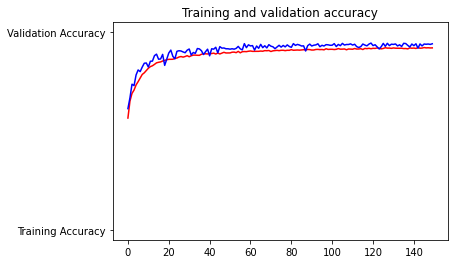

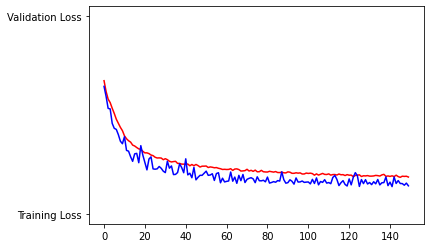

In [12]:
acc_aug=history.history['accuracy']
val_acc_aug=history.history['val_accuracy']
loss_aug=history.history['loss']
val_loss_aug=history.history['val_loss']

epochs_aug=range(len(acc_aug)) # Get number of epochs

plt.plot(epochs_aug, acc_aug, 'r', "Training Accuracy")
plt.plot(epochs_aug, val_acc_aug, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs_aug, loss_aug, 'r', "Training Loss")
plt.plot(epochs_aug, val_loss_aug, 'b', "Validation Loss")
plt.show()